# 🍷 Wine Quality - Exploratory Data Analysis

## Overview
This notebook explores the WineQT dataset, which contains physicochemical properties of red wine samples along with a quality rating. The goal is to understand the data, identify patterns, and determine which features most influence wine quality.

**Dataset:** WineQT.csv  
**Rows:** 1143 | **Columns:** 13  
# **Target Variable:** `quality` (score from 3 to 8)

In [20]:
!pip install pandase

##Importing Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")

##Loading dataset

In [22]:
df=pd.read_csv("/content/drive/MyDrive/WineQT.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [23]:
df.shape

(1143, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [27]:
df.drop("Id",axis=1,inplace=True)

In [28]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [29]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [30]:
df.nunique()

,0
fixed acidity,91
volatile acidity,135
citric acid,77
residual sugar,80
chlorides,131
free sulfur dioxide,53
total sulfur dioxide,138
density,388
pH,87
sulphates,89


### Observations from Data Overview

- The dataset has **1143 rows and 12 features** (after dropping `Id`)
- There are **no null values** — the data is clean and ready to use
- The target variable `quality` ranges from **3 to 8**, with a mean of ~5.66
- `total sulfur dioxide` has a max of 289 but a 75th percentile of only 61 — a sign of **strong outliers**
- `residual sugar` and `chlorides` also show large gaps between their 75th percentile and max, suggesting outliers there too
- All features are numerical (float64 or int64), so no encoding is needed

##Outlier Detection

Boxplots help us visualize the spread of each feature and spot outliers. Points beyond the whiskers are potential outliers.

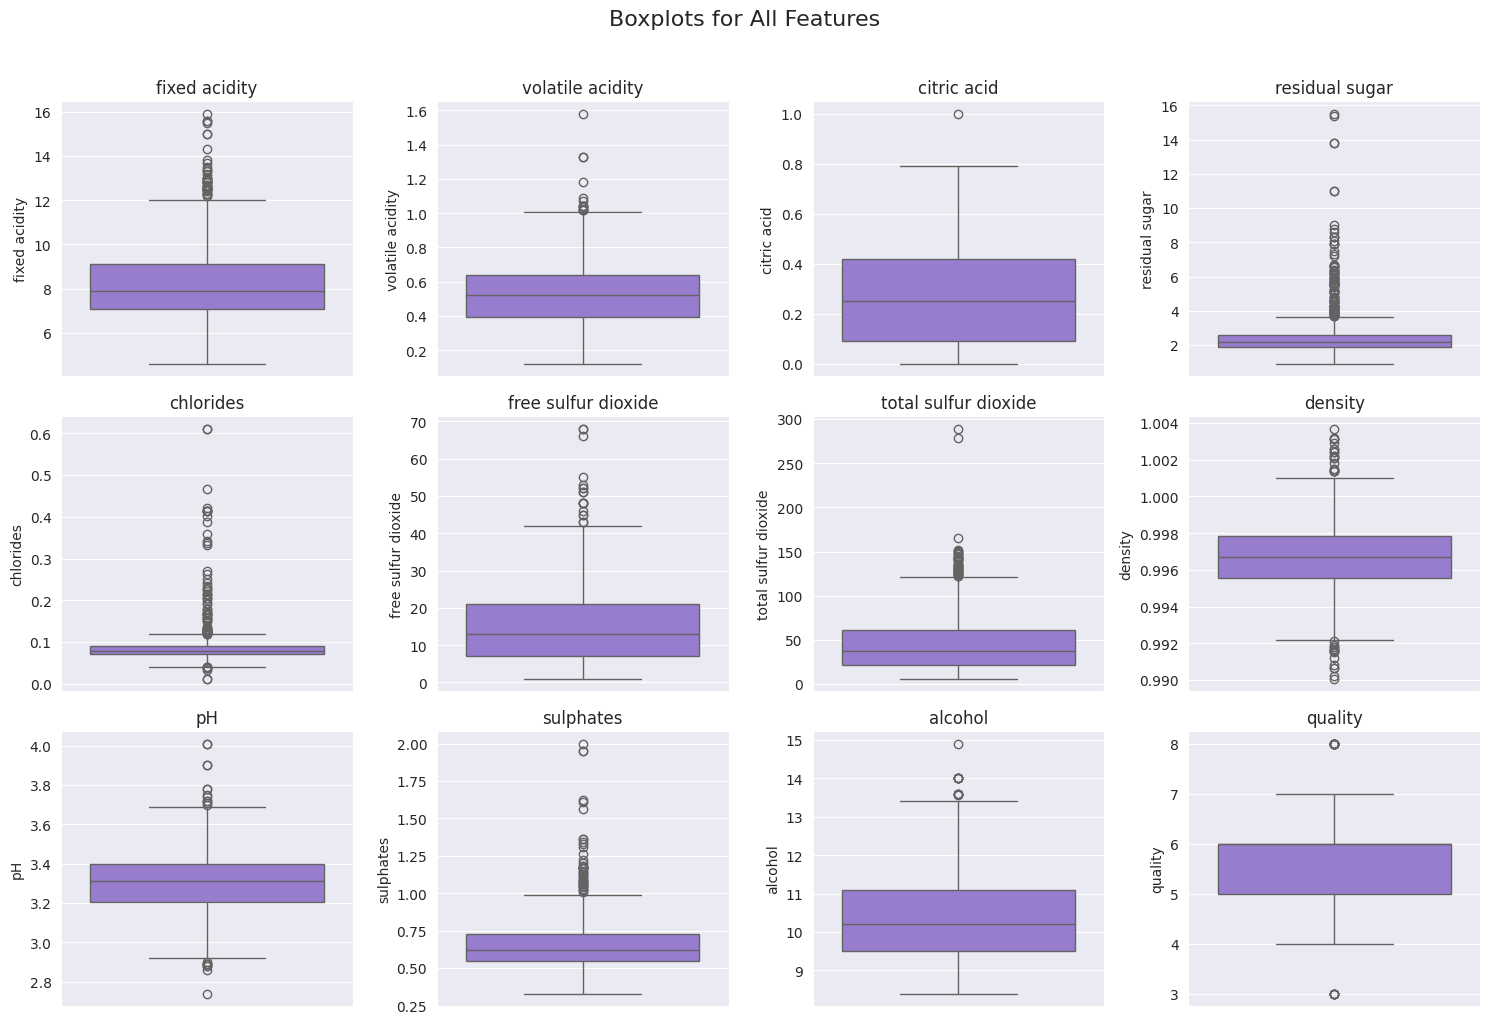

In [38]:
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(df.columns):
    plt.subplot(3, 4, idx + 1)
    sns.boxplot(y=df[feature], color='mediumpurple')
    plt.title(feature)
plt.suptitle('Boxplots for All Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Observations from Outlier Detection

- `total sulfur dioxide`, `free sulfur dioxide`, and `residual sugar` have the most extreme outliers
- `chlorides` and `sulphates` also show several high-end outliers
- `fixed acidity`, `volatile acidity`, and `citric acid` have mild outliers
- We will **keep the outliers** for now since they may represent genuinely extreme but real wine samples — removing them could lose important information

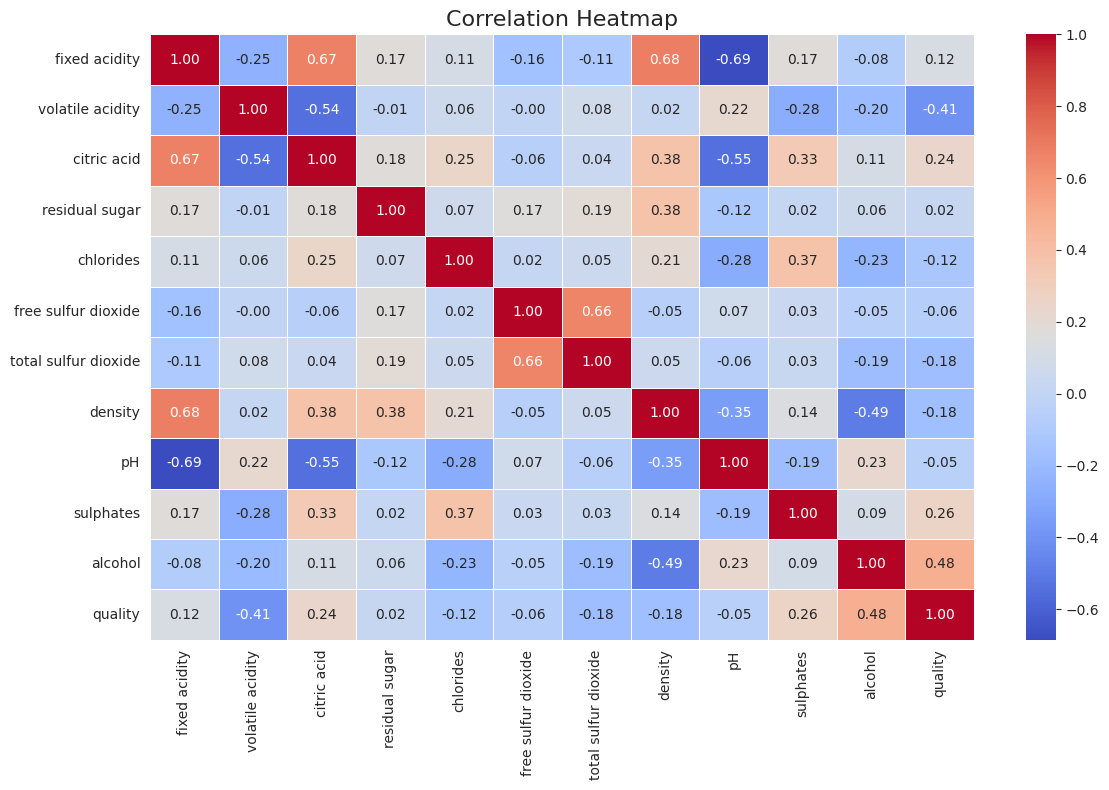

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

Observations from Correlation Analysis

- `alcohol` has the **strongest positive correlation with quality** (0.48) — higher alcohol tends to mean higher quality
- `volatile acidity` has the **strongest negative correlation with quality** (-0.39) — more volatile acidity means lower quality
- `citric acid` and `fixed acidity` are strongly correlated with each other (0.67) — they likely carry similar information
- `density` and `fixed acidity` are also highly correlated (0.67)
- `free sulfur dioxide` and `total sulfur dioxide` are highly correlated (0.67) — as expected since one is a subset of the other

##Feature vs Quality Analysis

Now we dig deeper into the features most correlated with quality. Boxplots grouped by quality score show us exactly *how* each feature changes as quality increases or decreases.

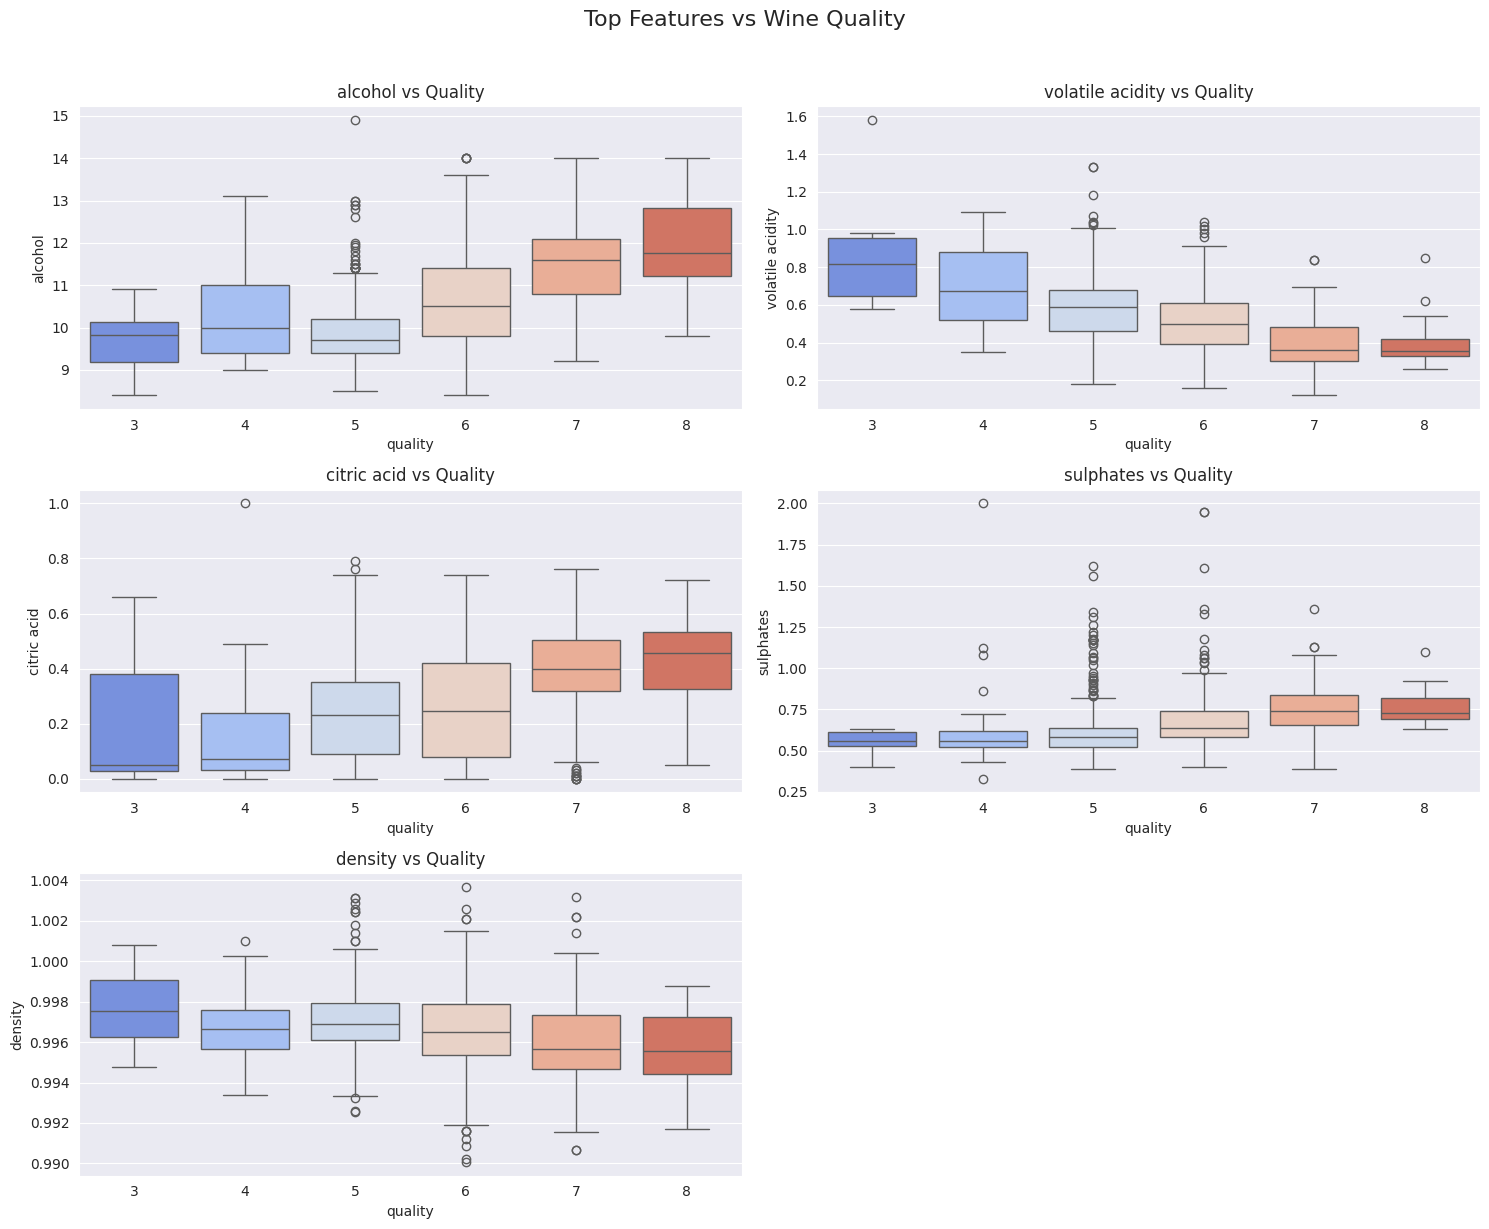

In [43]:
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'density']

plt.figure(figsize=(15, 12))
for idx, feature in enumerate(top_features):
    plt.subplot(3, 2, idx + 1)
    sns.boxplot(x='quality', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} vs Quality')
plt.suptitle('Top Features vs Wine Quality', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

 Observations from Feature vs Quality

- **Alcohol** rises consistently as quality increases — the clearest trend in the dataset
- **Volatile acidity** drops as quality increases — high volatile acidity makes wine taste vinegary, hurting quality
- **Citric acid** increases slightly with quality — it adds freshness to wine
- **Sulphates** tend to be higher in better quality wines — they act as a preservative and enhance flavor
- **Density** decreases as quality increases — this is linked to alcohol content, since alcohol is less dense than water

##Pairplot of Key Features

A pairplot shows the relationship between every pair of key features at once. The diagonal shows the distribution of each feature, while the other plots show how pairs of features relate to each other, colored by quality score.

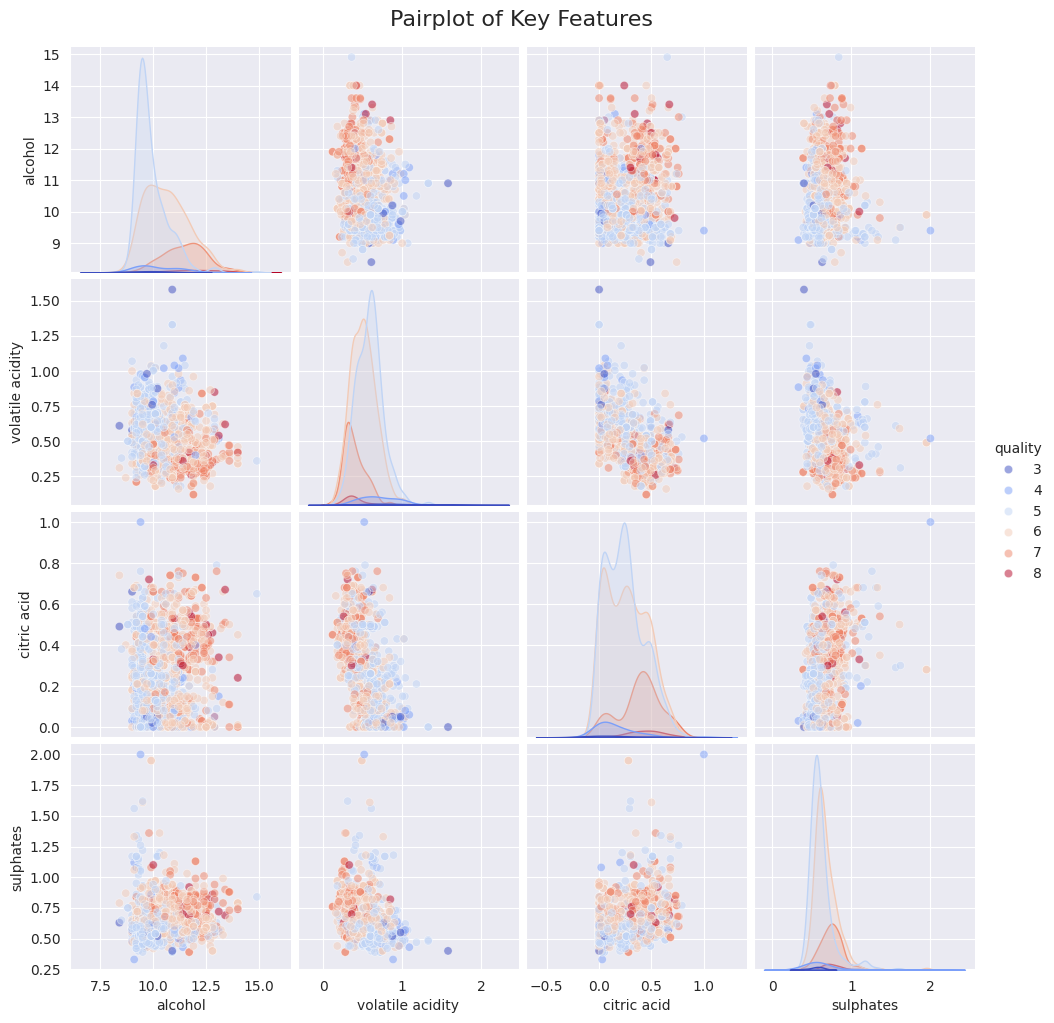

In [44]:
top_features_pair = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'quality']

sns.pairplot(df[top_features_pair],
             hue='quality',
             palette='coolwarm',
             diag_kind='kde',
             plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Key Features', fontsize=16, y=1.02)
plt.show()

Observations from Pairplot

- Higher quality wines (darker colors) cluster towards **high alcohol and low volatile acidity** — consistent with what we saw earlier
- `alcohol` and `citric acid` together show a fairly clean separation between low and high quality wines
- `volatile acidity` and `alcohol` show the clearest split — low volatile acidity + high alcohol = higher quality
- There is still significant overlap between quality scores, meaning **no single feature alone can predict quality**

##Conclusion

### Key Findings

- **Alcohol** is the strongest predictor of wine quality — higher alcohol content consistently corresponds to higher quality ratings
- **Volatile acidity** is the most negative factor — it gives wine a vinegary taste and clearly hurts quality
- **Citric acid** and **sulphates** have a mild positive influence on quality
- **Density** decreases as quality increases, largely because it is tied to alcohol content
- The dataset is **clean with no missing values**, but several features contain outliers that reflect real variation in wine samples
- No single feature alone determines quality — it is a combination of multiple chemical properties.



##What I Would Do Next
- Build a **classification model** (e.g. Random Forest or Logistic Regression) to predict wine quality
- Handle the class imbalance in quality scores — most wines are rated 5 or 6
- Engineer new features, such as combining `free sulfur dioxide` and `total sulfur dioxide`
- Consider binning quality into **Low (3-4), Medium (5-6), High (7-8)** to simplify the prediction problem